<a href="https://colab.research.google.com/github/deisyvilla90/My-Python-Journey/blob/main/DKV_NYC_School_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

url = "https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv"
df = pd.read_csv(url)
df.head()


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [16]:
list(df.columns)


['School DBN',
 'School Name',
 'School Level',
 'Regents Exam',
 'Year',
 'Total Tested',
 'Mean Score',
 'Number Scoring Below 65',
 'Percent Scoring Below 65',
 'Number Scoring 65 or Above',
 'Percent Scoring 65 or Above',
 'Number Scoring 80 or Above',
 'Percent Scoring 80 or Above',
 'Number Scoring CR',
 'Percent Scoring CR']

In [20]:
[col for col in df.columns if "score" in col.lower()]


['Mean Score']

In [21]:
[col for col in df.columns if "percent" in col.lower()]


['Percent Scoring Below 65',
 'Percent Scoring 65 or Above',
 'Percent Scoring 80 or Above',
 'Percent Scoring CR']

In [22]:
df["Percent Scoring 65 or Above"] = pd.to_numeric(df["Percent Scoring 65 or Above"], errors="coerce")
df_clean = df.dropna(subset=["Percent Scoring 65 or Above"])


In [23]:
school_averages = df_clean.groupby("School Name")["Percent Scoring 65 or Above"].mean()
school_averages.head()


,Percent Scoring 65 or Above
School Name,
47 The American Sign Language and English Secondar,45.223671
A. Philip Randolph Campus High School,57.814441
ACORN Community High School,43.381726
Abraham Lincoln High School,47.472727
Abraham Lincoln Yabc,37.966667


In [24]:
school_averages.sort_values(ascending=False).head(10)


,Percent Scoring 65 or Above
School Name,
P.S. 229 Dyker,100.0
Washington Heights Academy,100.0
Icahn Charter School 3,100.0
Icahn Charter School 2,100.0
"Ballet Tech, NYC Public School for Dance",100.0
J.H.S. 074 Nathaniel Hawthorne,100.0
P.S. 175 City Island,100.0
P.S./M.S. 194,100.0
I.S. 075 Frank D. Paulo,100.0


In [25]:
school_averages_df = school_averages.reset_index().sort_values("Percent Scoring 65 or Above", ascending=False)
school_averages_df.head()


,School Name,Percent Scoring 65 or Above
711,P.S. 229 Dyker,100.0
938,Washington Heights Academy,100.0
421,Icahn Charter School 3,100.0
420,Icahn Charter School 2,100.0
51,"Ballet Tech, NYC Public School for Dance",100.0


In [26]:
school_averages.sort_values().head(10)


,Percent Scoring 65 or Above
School Name,
P.S. 165 Ida Posner,0.000000
The Urban Assembly Unison School,9.366667
P.S./M.S 042 R. Vernam,17.200000
Kennedy Yabc,18.658400
St. HOPE Leadership Academy Charter School,20.723810
Dewitt Clinton Campus YABC,21.172414
Globe School for Environmental Research,22.500000
Academy for Social Action,23.013216
H.S. Arts & Business Yabc,23.861379


In [27]:
school_averages_percent = (school_averages.round(2).astype(str) + "%")
school_averages_percent.head(10)


,Percent Scoring 65 or Above
School Name,
47 The American Sign Language and English Secondar,45.22%
A. Philip Randolph Campus High School,57.81%
ACORN Community High School,43.38%
Abraham Lincoln High School,47.47%
Abraham Lincoln Yabc,37.97%
Academy For Personal Leadership And Excellence,68.44%
Academy for Careers in Television and Film,66.12%
Academy for College Preparation and Career Explora,44.39%
Academy for Conservation and the Environment,42.77%


In [28]:
school_averages = df_clean.groupby("School Name")["Percent Scoring 65 or Above"].mean()


In [29]:
school_averages_percent = school_averages.round(2).astype(str) + "%"
school_averages_percent.head()


,Percent Scoring 65 or Above
School Name,
47 The American Sign Language and English Secondar,45.22%
A. Philip Randolph Campus High School,57.81%
ACORN Community High School,43.38%
Abraham Lincoln High School,47.47%
Abraham Lincoln Yabc,37.97%


In [30]:
lowest_percent = (school_averages
                  .sort_values()
                  .round(2)
                  .astype(str) + "%")

lowest_percent.head(10)


,Percent Scoring 65 or Above
School Name,
P.S. 165 Ida Posner,0.0%
The Urban Assembly Unison School,9.37%
P.S./M.S 042 R. Vernam,17.2%
Kennedy Yabc,18.66%
St. HOPE Leadership Academy Charter School,20.72%
Dewitt Clinton Campus YABC,21.17%
Globe School for Environmental Research,22.5%
Academy for Social Action,23.01%
H.S. Arts & Business Yabc,23.86%


In [31]:
school_averages_sorted = school_averages.sort_values()


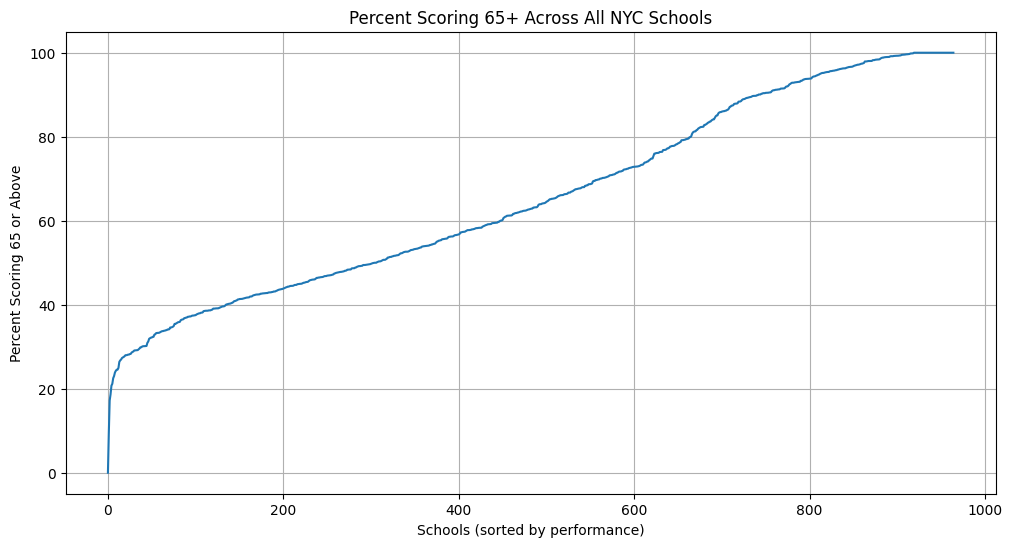

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(school_averages_sorted.values)

plt.title("Percent Scoring 65+ Across All NYC Schools")
plt.xlabel("Schools (sorted by performance)")
plt.ylabel("Percent Scoring 65 or Above")
plt.grid(True)

plt.show()


In [36]:
df.isnull().sum()


,0
School DBN,0
School Name,0
School Level,0
Regents Exam,10
Year,0
Total Tested,0
Mean Score,0
Number Scoring Below 65,0
Percent Scoring Below 65,0
Number Scoring 65 or Above,0


In [37]:
df[df.isnull().any(axis=1)]


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,NaN,s,s,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,NaN,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,NaN,s,s,na,na
15,01M188,P.S. 188 The Island School,K-8,Common Core English,2016,1,s,s,s,s,NaN,s,s,na,na
17,01M188,P.S. 188 The Island School,K-8,Living Environment,2017,3,s,s,s,s,NaN,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,NaN,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,NaN,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,NaN,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,NaN,s,s,na,na


In [38]:
df.isnull().values.any()


np.True_

In [40]:
df.isnull().sum().sum()


np.int64(75232)

In [41]:
(df.isnull().mean() * 100).round(2)


,0
School DBN,0.00
School Name,0.00
School Level,0.00
Regents Exam,0.00
Year,0.00
Total Tested,0.00
Mean Score,0.00
Number Scoring Below 65,0.00
Percent Scoring Below 65,0.00
Number Scoring 65 or Above,0.00


In [42]:
df_clean = df.copy()
df_clean["Percent Scoring 65 or Above"] = pd.to_numeric(df_clean["Percent Scoring 65 or Above"], errors="coerce")
df_clean = df_clean.dropna(subset=["Percent Scoring 65 or Above"])


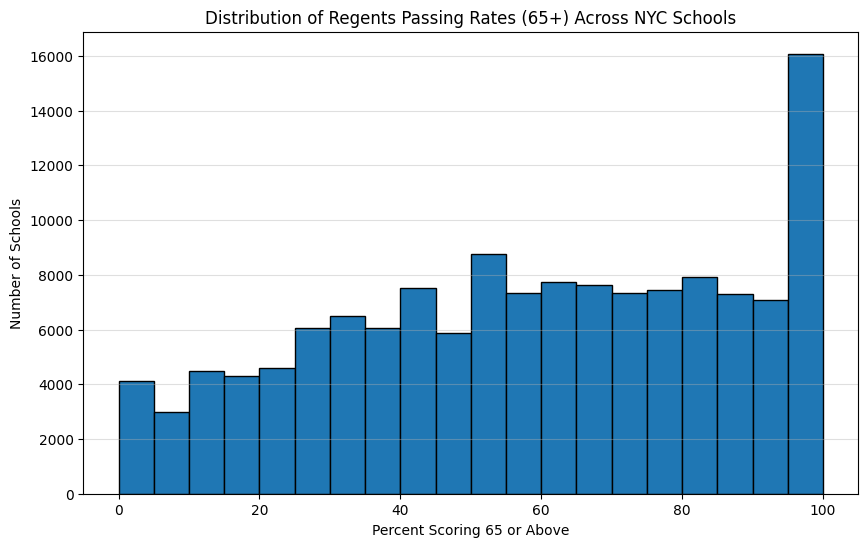

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.hist(df_clean["Percent Scoring 65 or Above"], bins=20, edgecolor='black')

plt.title("Distribution of Regents Passing Rates (65+) Across NYC Schools")
plt.xlabel("Percent Scoring 65 or Above")
plt.ylabel("Number of Schools")

plt.grid(axis='y', alpha=0.4)
plt.show()


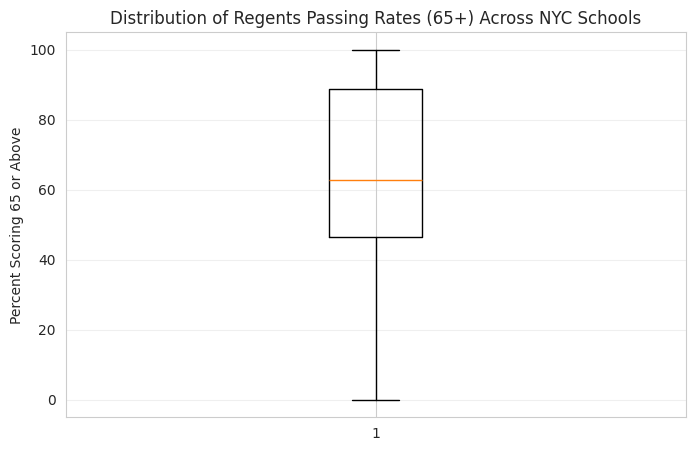

In [57]:
import matplotlib.pyplot as plt

# Making a boxplot of all school average passing scores
plt.figure(figsize=(8,5))
plt.boxplot(school_averages)

plt.title("Distribution of Regents Passing Rates (65+) Across NYC Schools")
plt.ylabel("Percent Scoring 65 or Above")

plt.grid(axis='y', alpha=0.3)
plt.show()


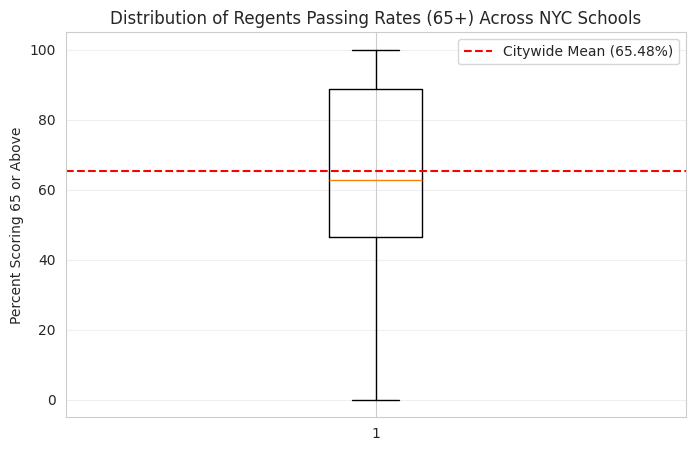

In [58]:
plt.figure(figsize=(8,5))
plt.boxplot(school_averages)

# Add citywide mean
city_mean = school_averages.mean()
plt.axhline(city_mean, color='red', linestyle='--', label=f"Citywide Mean ({city_mean:.2f}%)")

plt.title("Distribution of Regents Passing Rates (65+) Across NYC Schools")
plt.ylabel("Percent Scoring 65 or Above")
plt.legend()

plt.grid(axis='y', alpha=0.3)
plt.show()


In [62]:
df_clean.columns


Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [63]:
[col for col in df_clean.columns if "boro" in col.lower()]


[]

In [64]:
def get_borough(dbn):
    letter = dbn[2]  # 3rd character of DBN
    if letter == "M":
        return "Manhattan"
    elif letter == "X":
        return "Bronx"
    elif letter == "K":
        return "Brooklyn"
    elif letter == "Q":
        return "Queens"
    elif letter == "R":
        return "Staten Island"
    else:
        return "Other"

df_clean["Borough"] = df_clean["School DBN"].apply(get_borough)


In [65]:
borough_compare = df_clean.groupby("Borough")["Percent Scoring 65 or Above"].mean()
borough_compare


,Percent Scoring 65 or Above
Borough,
Bronx,50.640540
Brooklyn,55.642389
Manhattan,62.232438
Queens,64.960967
Staten Island,64.462833


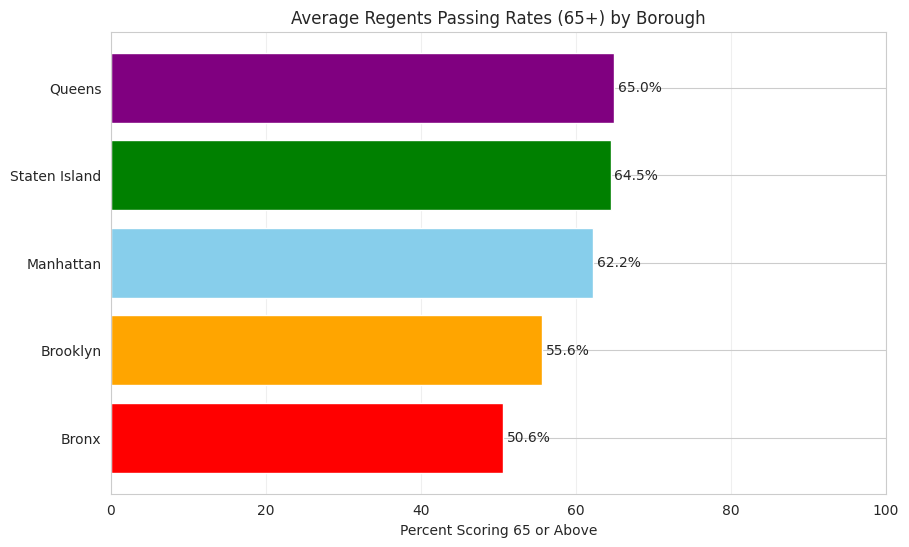

In [66]:
import matplotlib.pyplot as plt

# Sort values so chart goes from lowest → highest
borough_compare_sorted = borough_compare.sort_values()

plt.figure(figsize=(10,6))

plt.barh(borough_compare_sorted.index, borough_compare_sorted.values,
         color=["red", "orange", "skyblue", "green", "purple"])

plt.xlabel("Percent Scoring 65 or Above")
plt.title("Average Regents Passing Rates (65+) by Borough")

# Add value labels for clarity
for index, value in enumerate(borough_compare_sorted.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')

plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)

plt.show()
